# Homework 4
Deadline: 2nd February 23:59, delivered to your tutor.





# Exercise: Understanding Independence and Correlation

## Background Information

1. **Independence of Random Variables**  
   Two random variables $X$ and $Y$ are said to be independent if the occurrence of one does not affect the probability of the other. Mathematically, this means:  
   $$
   P(X \leq x, Y \leq y) = P(X \leq x)P(Y \leq y) \quad \text{for all } x, y.
   $$
   Equivalently, their joint probability density function (pdf) or mass function can be written as the product of their marginal pdfs or mass functions:  
   $$
   f_{X,Y}(x, y) = f_X(x)f_Y(y).
   $$

2. **Correlation**  
   The correlation between two random variables $X$ and $Y$ is a measure of their linear relationship, defined as:  
   $$
   \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}.
   $$
   Here, $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\text{Var}(X)$ and $\text{Var}(Y)$ are their variances. If $\rho(X, Y) = 0$, it means there is no linear relationship between $X$ and $Y$, but they may still be dependent.

---

## Task 1a (0.5p)

   Find a specific example of two random variables $X$ and $Y$ such that:
   - $X$ and $Y$ are dependent.
   - The correlation $\rho(X, Y)$ is equal to $0$.

Attach proof, either as markdown code, or photo.


## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

**Write your answers clearly!**

# TASK 1a)  
Example: A Symmetric Function
Let $( X $) be a standard normal random variable:  
$$
X \sim \mathcal{N}(0,1)
$$

Define $( Y $) as:  
$$
Y = X^2 - 1
$$

Clearly, $( X $) and $( Y $) are dependent since $( Y $) is determined by $( X $). However, the correlation between $( X $) and $( Y $) is zero.

### Proof:

The correlation is given by:

$$
\rho(X,Y) = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}}
$$

#### Step 1: Compute $( \mathbb{E}[X] $) and $( \mathbb{E}[Y] $)

Since $( X \sim \mathcal{N}(0,1) $), we know:

$$
\mathbb{E}[X] = 0, \quad \mathbb{E}[X^2] = 1
$$

$$
\mathbb{E}[Y] = \mathbb{E}[X^2 - 1] = \mathbb{E}[X^2] - 1 = 1 - 1 = 0
$$

#### Step 2: Compute $( \text{Cov}(X,Y) $)

$$
\text{Cov}(X, Y) = \mathbb{E}[XY] - \mathbb{E}[X] \mathbb{E}[Y]
$$

Since $( \mathbb{E}[X] = 0 $) and $( \mathbb{E}[Y] = 0 $), we get:

$$
\text{Cov}(X, Y) = \mathbb{E}[X Y] = \mathbb{E}[X (X^2 - 1)]
$$

Expanding:

$$
\mathbb{E}[X Y] = \mathbb{E}[X^3] - \mathbb{E}[X]
$$

From normal distribution properties, the third moment of a standard normal is:

$$
\mathbb{E}[X^3] = 0
$$

Thus,

$$
\mathbb{E}[X Y] = 0 - 0 = 0
$$

which implies:

$$
\text{Cov}(X, Y) = 0
$$

#### Step 3: Conclusion

Since covariance is zero, the correlation is:

$$
\rho(X, Y) = \frac{0}{\sqrt{\text{Var}(X) \text{Var}(Y)}} = 0
$$

Thus, $( X $) and $( Y $) are **dependent** (since $( Y $) is fully determined by $( X $)) but have **zero correlation**.


# **TASK 1b:**

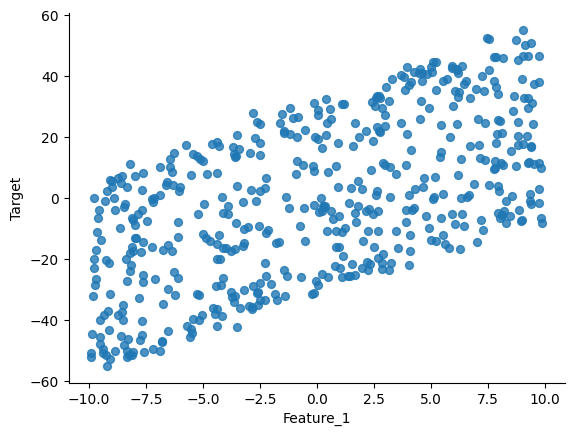

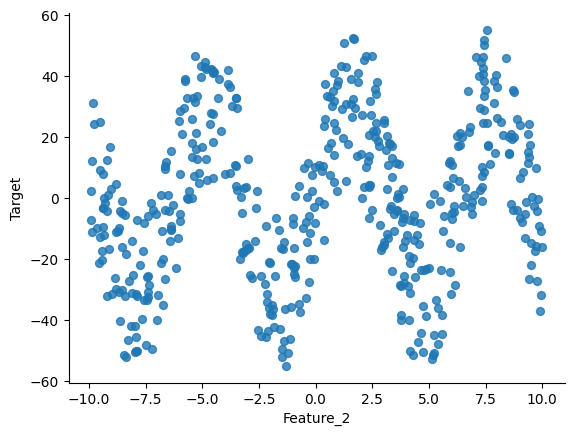

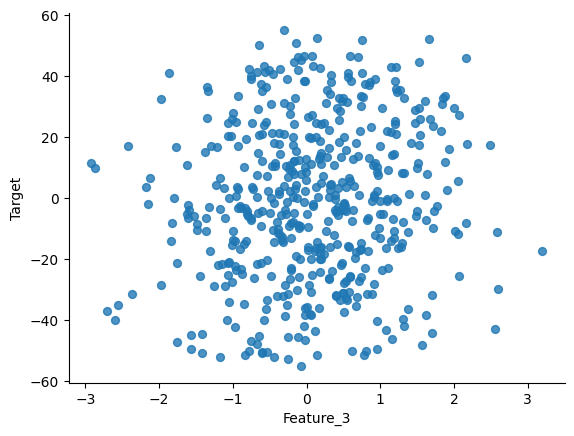

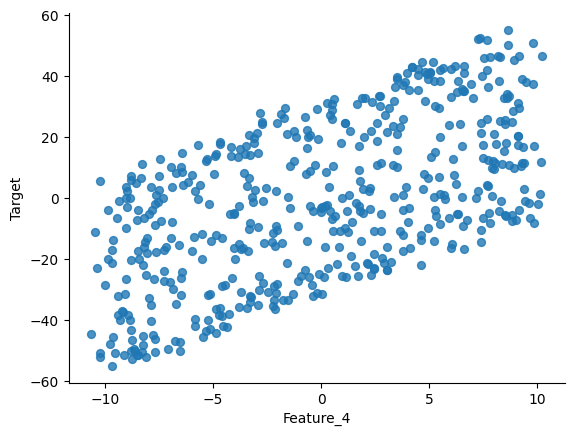

In [ ]:
# @title Features vs Target
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('data.csv')

data.plot(kind='scatter', x='Feature_1', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_2', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_3', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_4', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


**Here we can observe, that plots for feature 1,4 are very similar,
plot for feature 2, suggests that it could be fit into a polynomial function,
plot for feature 3 shows that the points are scattered.**

           Feature_1  Feature_2  Feature_3  Feature_4    Target
Feature_1   1.000000   0.044031   0.038552   0.996672  0.600176
Feature_2   0.044031   1.000000  -0.022952   0.042055  0.179238
Feature_3   0.038552  -0.022952   1.000000   0.038521  0.111958
Feature_4   0.996672   0.042055   0.038521   1.000000  0.593566
Target      0.600176   0.179238   0.111958   0.593566  1.000000


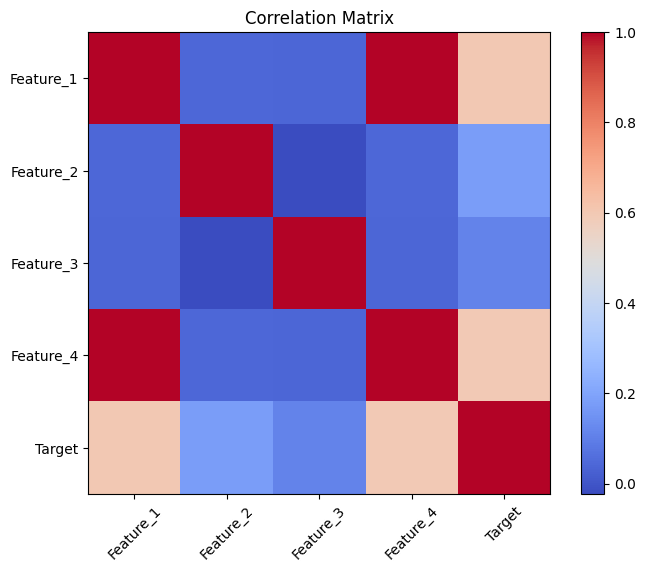

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Calculate correlations
correlations = data.corr()

# Print the correlation matrix
print(correlations)

# Visualize the correlations (optional)
plt.figure(figsize=(8, 6))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=45)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Matrix')
plt.show()

Feature_1 and Feature_4 are highly correlated (0.996672) -  These two features might be carrying almost identical information.

Feature_2 and Feature_3 have very weak correlations with other features - independent.

Feature_1 (0.600176) and Feature_4 (0.593566) have the highest correlation with the Target.

Feature_2 (0.179238) and Feature_3 (0.111958) show weak correlations with the Target - may not be useful in predicting.

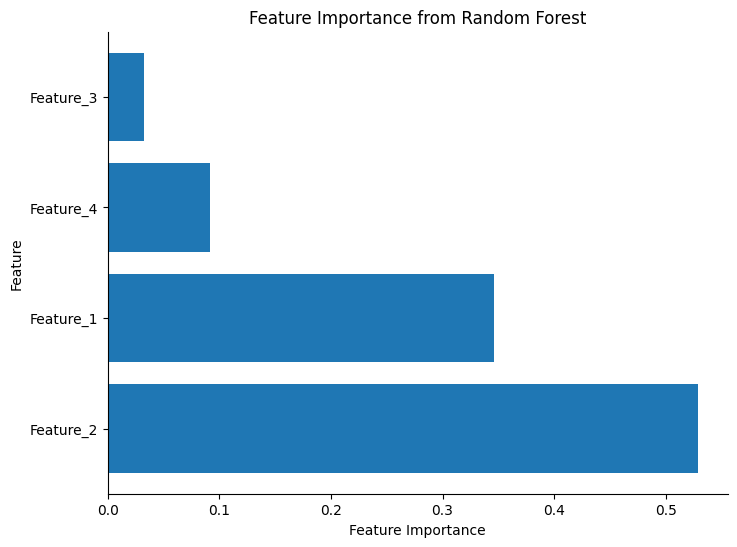

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Calculate feature importances using RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(data.drop("Target", axis=1), data["Target"])
importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': data.drop("Target", axis=1).columns,
                             'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

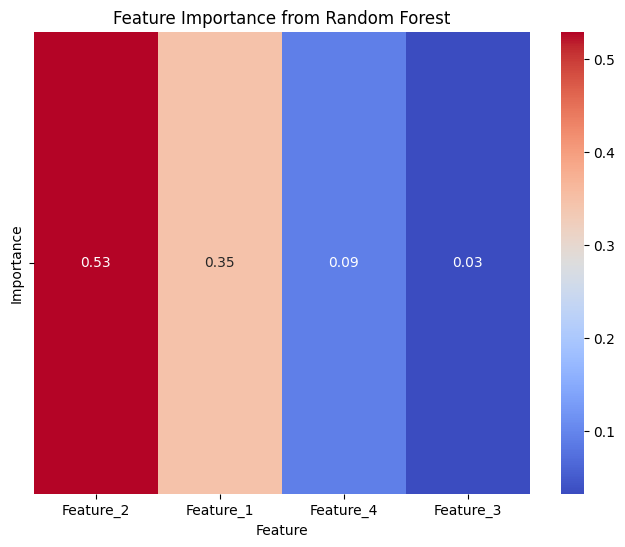

In [ ]:
# prompt: do the same plot as above but instead of correlation use feature importance from random forest

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Importance from Random Forest')
plt.show()

**Feature_1** remains important (0.35), aligning with its strong correlation (0.60).

**Feature_2** is the most important feature (0.53) in the Random Forest model, even though its correlation with the target (0.18) was weaker than Feature_1 or Feature_4. This suggests that Feature_2 captures some non-linear or interaction effects that correlation (which measures only linear relationships) does not capture.

**Feature_3** had low correlation (0.11) and very low feature importance (0.03) - not useful

**Feature_4** had a high correlation with the target (0.59) but low feature importance (0.09). Since Feature_4 was highly correlated with Feature_1 (0.996), the model likely considered Feature_1 redundant with Feature_4 and assigned more importance to Feature_1.


# Problem 2

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

--------------------
Considering a dataset $(X)$ in $\mathbb{R}_n^d$, where $d$ is the number of features (columns) and $n$ is the number of samples (rows). The total variance in the dataset is given by the sum of variances of all its features:

$\sum_{i=1}^d D^2X^i$ = $\sum_{i=1}^d Var(X^i)$

Now, let $( X_{pca} )$ in $\mathbb{R}_n^d$ be the dataset transformed by Principal Component Analysis (PCA). We need to show that PCA preserves the total variance, meaning:

$\sum_{i=1}^d D^2X^i$ = $\sum_{i=1}^d D^2X_{pca}^i$

PCA transforms the original dataset $(X)$ using an orthogonal transformation $(P)$, such that:

$X_{pca} = XP$

where $(P)$ is a $d \times d$ orthogonal matrix whose columns are the eigenvectors of the covariance matrix of $(X)$. Since $(P)$ is orthogonal, we have the key property:

$P^TP=I$

The covariance matrix of $(X)$ is given by:

$C_X = n^{-1}X^TX$

Under the PCA transformation, the covariance matrix of $( X_{pca} )$ is:

$C_{X_{pca}}=P^TC_xP$


Since PCA preserves eigenvalues, the total variance (sum of eigenvalues of the covariance matrix) remains the same:

$\sum_{i=1}^d \lambda_i$ = $\sum_{i=1}^d \lambda'_i$.


Since the variance of each feature is represented by the eigenvalues of the covariance matrix, and PCA does not change the sum of eigenvalues, it follows that:

$\sum_{i=1}^d D^2X^i$ = $\sum_{i=1}^d D^2X_{pca}^i$

Which means that the total variance is preserved under PCA transformation. $ \square$

# **Problem 3 (1p)**

In this problem you will use algorithm from Online Learning and Boosting, called Multiplicative Weights Update https://www.cs.princeton.edu/~arora/pubs/MWsurvey.pdf to solve the following optimization problem.

## Problem Definition
- **Input**:
  - Universe $U = \{1, 2, \dots, n\}$
  - Sets $\mathcal{S} = \{S_1, \dots, S_m\},\ S_i \subseteq U$
- **Goal**: Find smallest $\mathcal{C} \subseteq \mathcal{S}$ covering $U$

## Algorithm

**Initialize weights**:
   $$
   w_u^{(1)} = 1 \quad \forall u \in U
   $$

**Repeat until all elements covered**:
1. **Choose set** $S_i$ with probability:
   $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$

2. **Add** $S_i$ to solution $\mathcal{C}$

3. **Update weights** for uncovered $u \in S_i$:
   $$
   w_u^{(t+1)} = \frac{1}{2}w_u^{(t)}
   $$

## Task
1. Show that the total number of rounds (the number of sets the algorithm returns) is on expectation at most O(\log n) worse than the optimum number of sets needed:
   $$
   \mathbb{E}[T] \leq 2\text{OPT}\ln n
   $$



-------------------------------------------------------------------------------------------------
Let the total weight at round $t$ be: $W^{(t)}$ = ${\sum_{u \in U} w_u^{(t)}}$

Initially, since all elements have weight 1:  $W^{(1)}$ = $n$


Each round, we select a set $S_i$ with probability: $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$
Adding $S_i$​ to the cover reduces the weight of all elements in $S_i$​ by a factor of 1/2. Since the optimal solution covers all elements using **OPT** sets, the best possible case is that each optimal set covers an equal portion of the total weight.

Let $S_1^∗,S_2^∗,...,S_{OPT}$ be the optimal sets. Since they fully cover $U$, at least one optimal set satisfies:  $${\sum_{u \in S_j^*} w_u^{(t)}} >=\frac{ W^{(t)}}{OPT}$$

Since our algorithm picks a set $Si$​ with probability proportional to the weight it covers, the expected weight reduction per round is at least:
 $$E[W^{(t+1)}] <= W^{(t)} (1-\frac{1}{2OPT})$$

Which, after $T$ rounds is:
 $$E[W^{(T)}] <= n (1-\frac{1}{2OPT})^T$$

The algorithm stops when all elements are covered, meaning W(T)W(T) is very small. Assumed it drops below 1:
$$n (1-\frac{1}{2OPT})^T<=1$$
$$ln n+Tln(\frac{1}{2OPT}​)<=0$$

if $ln⁡(1−x)≈−x$ for small x:
$$lnn-T\frac{1}{2OPT}<=0$$
$$T>=2OPTlnn$$

which means that the expected number of rounds is: $E[T]<=2OPTlnn$ $ \square$